__Background__
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their GitHub repository.

__Task__
For this project, 'll clean and explore the dataset in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

__Info about Data Set__
<br>Get Data Set from here:<br>
https://github.com/fivethirtyeight/data/tree/master/star-wars-survey
<br>eightthirtyfive article:<br>
https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/



Import packages

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

#### Load Data

In [4]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Check Data

In [5]:
star_wars[star_wars.columns[3:15]].sample(5)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1067,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,5.0,6.0,3.0,1.0,2.0
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,5.0,6.0,1.0,2.0,3.0
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,Star Wars: Episode I The Phantom Menace,NaN,NaN,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,5.0,6.0,2.0,1.0,3.0


####  Getting Info about star wars dataframe

In [6]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Convert columns to bollean values

In [8]:
# columns converted: 
#    - Have you seen the 6 star wars movies?
#    - Do you consider yourself a fan of star wars?
yes_no ={'Yes':True, 'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
#check
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Rename columns "Which SW movie have you seen..."

Create dictionary to rename Which SW movie have you seen checkbox columns

In [9]:
col_rn_dict = dict(zip(star_wars.columns[3:9],
                   ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']))
star_wars = star_wars.rename(columns=col_rn_dict)

Convert "seen_1" column values

In [10]:
eps1_no={"Star Wars: Episode I  The Phantom Menace": True,
        np.NaN: False}

star_wars['seen_1'] = star_wars['seen_1'].map(eps1_no)

Convert "seen_2" column values

In [11]:
eps2_no={"Star Wars: Episode II  Attack of the Clones": True,
        np.NaN: False}

star_wars['seen_2'] = star_wars['seen_2'].map(eps2_no)

Convert "seen_3" column values

In [12]:
eps3_no={"Star Wars: Episode III  Revenge of the Sith": True,
        np.NaN: False}

star_wars['seen_3'] = star_wars['seen_3'].map(eps3_no)

Convert "seen_4" column values

In [13]:
eps4_no={"Star Wars: Episode IV  A New Hope": True,
        np.NaN: False}

star_wars['seen_4'] = star_wars['seen_4'].map(eps4_no)

Convert "seen_5" column values

In [14]:
eps5_no={"Star Wars: Episode V The Empire Strikes Back": True,
        np.NaN: False}

star_wars['seen_5'] = star_wars['seen_5'].map(eps5_no)

Convert "seen_6" column values

In [15]:
eps6_no={"Star Wars: Episode VI Return of the Jedi": True,
        np.NaN: False}

star_wars['seen_6'] = star_wars['seen_6'].map(eps6_no)

In [16]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

### Rename columns with rating of SW movies

rename columns with ranking_x

In [17]:
col_rn_dict = dict(zip(star_wars.columns[9:15],
                   ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']))
star_wars = star_wars.rename(columns=col_rn_dict)

In [18]:
star_wars.iloc[:,9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

### Correct rating columns

As Kwu mentions in his post:<br> https://community.dataquest.io/t/guided-project-star-wars-opinion-wars-never-neglect-to-learn-about-the-dataset/553526
<br> The __data is biased__ due the __choice of default value__. In case a subject has not seen the movie they filled a default number equal to the saga's number.<br> This means that if Episode III has not been seen, the value of 3 would be automatically filled.<br> The "FiveThirtyEight"-team dealt with that by analysing only a reduced number of subjects, that have seen the entire 6 movies.<br>https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/ <br> I came up with a way to remove default values (1-6) for not seen movies by rating them as np.nan

In [19]:
# Correct default-ratings by setting them to NaN
#so that the ratings of unseen movies = NaN

for coln,sni in zip(star_wars.columns[9:15],star_wars.columns[3:9]):
    star_wars[coln+'_corr'] = star_wars[coln]
    ns_bool = star_wars[sni]==False
    star_wars.loc[ns_bool,coln+'_corr']=np.nan

#### Comparing biased average ratings vs corrected average ratings

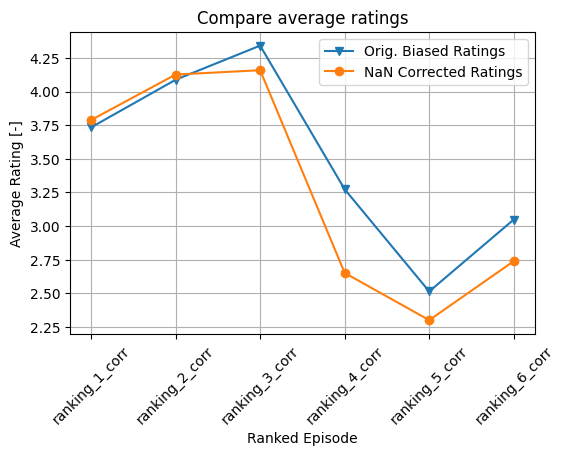

In [20]:
fig,axs = plt.subplots()
star_wars.iloc[:,9:15].mean().plot(marker='v')
star_wars.iloc[:,38:44].mean().plot(marker='o')
axs.grid(True)
axs.set_xticklabels(axs.get_xticklabels(),rotation=45)
axs.set_title('Compare average ratings')
axs.set_ylabel('Average Rating [-]')
axs.set_xlabel('Ranked Episode')
axs.legend(['Orig. Biased Ratings','NaN Corrected Ratings'])

#### Conclusion
With increasing Episode number 1->6 the biased average ratings show bigger difference compared against the corrected data.

### Analayse ratings vs watch-rates 

In [21]:
def calc_seen_perc(col):
    temp = col.value_counts()
    return temp.loc[True]/(temp[True]+temp[False])*100

(-0.5, 5.5)

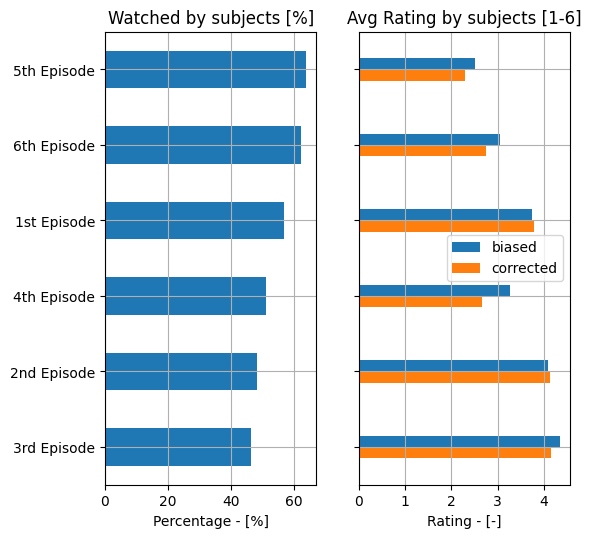

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
star_wars[star_wars.columns[3:9]].apply(calc_seen_perc).sort_values().plot.barh(ax=axs[0])
axs[0].set_title("Watched by subjects [%]")
axs[0].set_xlabel('Percentage - [%]')           
axs[0].set_yticklabels(['3rd Episode','2nd Episode','4th Episode',
                        '1st Episode','6th Episode','5th Episode'])
axs[0].grid(True)

#star_wars.iloc[:,9:15].mean().iloc[[0 1 2 3 5 4]].plot.barh(ax=axs[1],color='r')
star_wars.iloc[:,9:15].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1],color='tab:blue' ,width=0.15 ,align='edge')
star_wars.iloc[:,38:44].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1],color='tab:orange',width=-0.15,align='edge')
axs[1].set_title("Avg Rating by subjects [1-6]")
axs[1].set_xlabel('Rating - [-]')           
axs[1].set_yticklabels([])
axs[1].grid(True)
axs[1].legend(['biased','corrected'])
axs[1].set_ylim([-.5, 5.5])

### Conclusion
It seems that the most seen Star Wars movies (episode V + VI) are rated amongs highest. Whereas the less seen movies (episode II+III) achieved lowest rankings

####  Cross check with absolute numbers

In [23]:
def calc_seen_abs(col):
    temp = col.value_counts()
    return temp.loc[True]

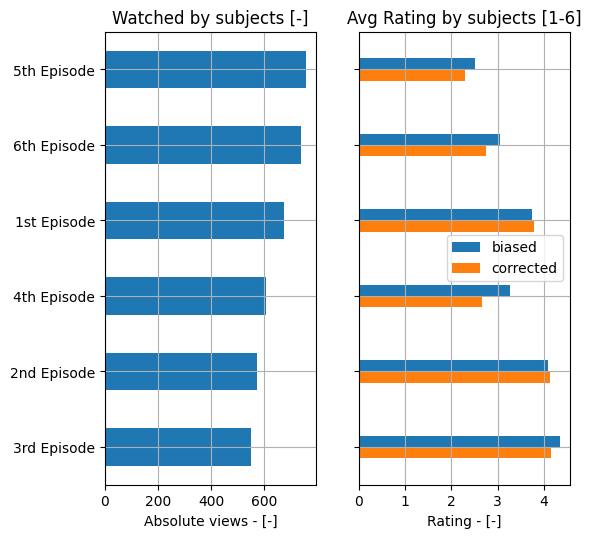

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
star_wars[star_wars.columns[3:9]].apply(calc_seen_abs).sort_values().plot.barh(ax=axs[0])
axs[0].set_title("Watched by subjects [-]")
axs[0].set_xlabel('Absolute views - [-]')           
axs[0].set_yticklabels(['3rd Episode','2nd Episode','4th Episode',
                        '1st Episode','6th Episode','5th Episode'])
axs[0].grid(True)

#star_wars.iloc[:,9:15].mean().iloc[[0 1 2 3 5 4]].plot.barh(ax=axs[1],color='r')
star_wars.iloc[:,9:15].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1],color='tab:blue' ,width=0.15 ,align='edge')
star_wars.iloc[:,38:44].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1],color='tab:orange',width=-0.15 ,align='edge')
axs[1].set_title("Avg Rating by subjects [1-6]")
axs[1].set_xlabel('Rating - [-]')           
axs[1].set_yticklabels([])
axs[1].grid(True)
axs[1].set_ylim([-.5, 5.5])
axs[1].legend(['biased','corrected'])

### Conclusion
Same trend can be seen on absolute views. Movies that have been seen by most of the inerviewed persons get the highest ratings (episode V+VI). Whereas movies with low view percentage seem to achieve lowest average ratings (episode II+III) 

### 7 Analyse absolute view numbers

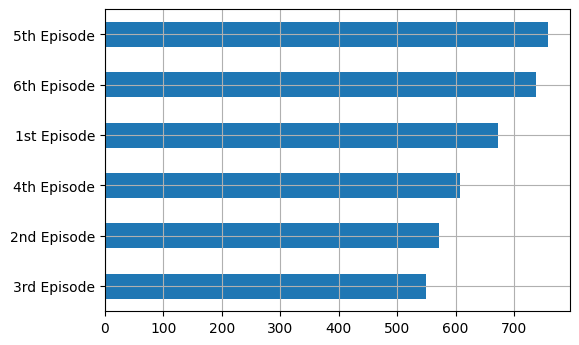

In [25]:
fix,axs = plt.subplots()
star_wars[star_wars.columns[3:9]].apply(sum).sort_values().plot.barh()
axs.set_yticklabels(['3rd Episode','2nd Episode','4th Episode',
                        '1st Episode','6th Episode','5th Episode'])
axs.grid(True)

### Conclusion
The ranking seems to match with the release date, Episode V getting most views. As sequel to Episode IV which created a lot of buzz with the initial release. <br>Episode 1 got a lot of media attention, by being the relaunch of the skywalker saga. Dragging a lot of viewers into the cinemas, this high attention seems then to have lowered for the following episodes II+III. 

### 8 Analyse influence of Star Wars Fan or Not?

In [26]:
sw_fans   = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
sw_nofans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]


In [27]:
#quick check amount of fans / no fans
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

##### Sorted by absolute views

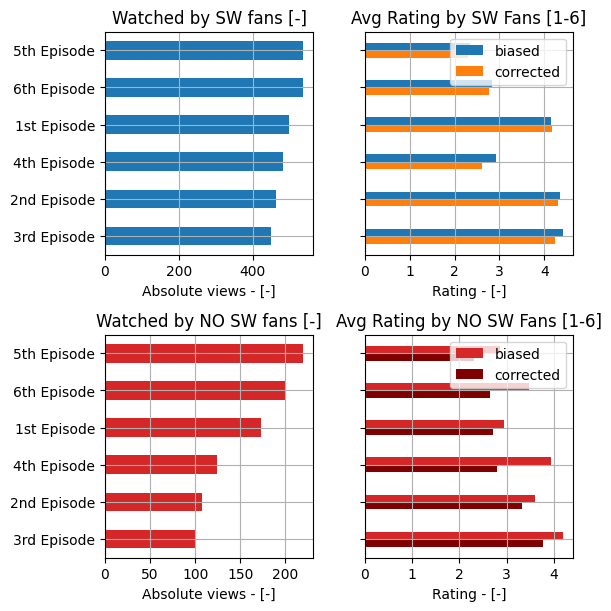

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6),constrained_layout=True)
sw_fans[sw_fans.columns[3:9]].apply(calc_seen_abs).sort_values().plot.barh(ax=axs[0,0])
sw_nofans[sw_nofans.columns[3:9]].apply(calc_seen_abs).sort_values().plot.barh(ax=axs[1,0],color='tab:red')

axs[0,0].set_title("Watched by SW fans [-]")
axs[0,0].set_xlabel('Absolute views - [-]')           
axs[0,0].set_yticklabels(['3rd Episode','2nd Episode','4th Episode',
                          '1st Episode','6th Episode','5th Episode'])

axs[1,0].set_title("Watched by NO SW fans [-]")
axs[1,0].set_xlabel('Absolute views - [-]')     
axs[1,0].set_yticklabels(['3rd Episode','2nd Episode','4th Episode',
                          '1st Episode','6th Episode','5th Episode'])

sw_fans.iloc[:,9:15].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[0,1],width=0.2 ,align='edge')
sw_fans.iloc[:,38:44].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[0,1],width=-0.2 ,align='edge',color='tab:orange')

sw_nofans.iloc[:,9:15].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1,1],color='tab:red',width=0.2 ,align='edge')
sw_nofans.iloc[:,38:44].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1,1],color='maroon',width=-0.2 ,align='edge')

axs[0,1].set_title("Avg Rating by SW Fans [1-6]")
axs[0,1].set_xlabel('Rating - [-]')           
axs[0,1].set_yticklabels([])
axs[0,1].set_ylim([-.5, 5.5])
axs[0,1].legend(['biased','corrected'])

axs[1,1].set_title("Avg Rating by NO SW Fans [1-6]")
axs[1,1].set_xlabel('Rating - [-]')           
axs[1,1].set_yticklabels([])
axs[1,1].set_ylim([-.5, 5.5])
axs[1,1].legend(['biased','corrected'])

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)


#### Sorted by average ranking

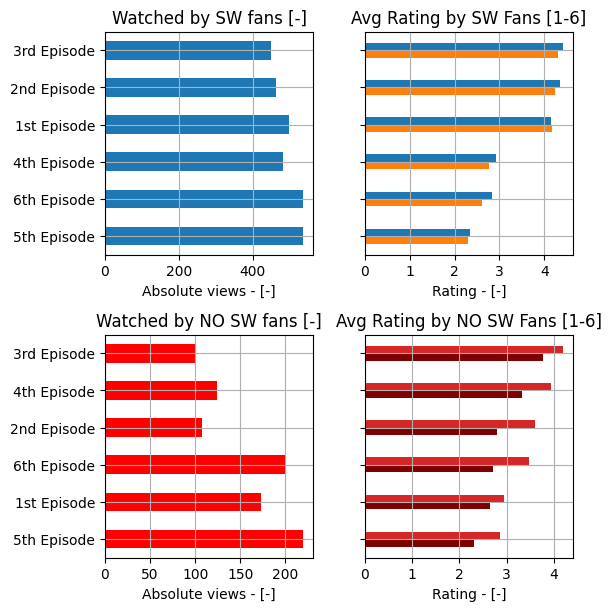

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6),constrained_layout=True)
sw_fans[sw_fans.columns[3:9]].apply(calc_seen_abs).iloc[[4,5,3,0,1,2]].plot.barh(ax=axs[0,0])
sw_nofans[sw_nofans.columns[3:9]].apply(calc_seen_abs).iloc[[4,0,5,1,3,2]].plot.barh(ax=axs[1,0],color='r')

axs[0,0].set_title("Watched by SW fans [-]")
axs[0,0].set_xlabel('Absolute views - [-]')           
axs[0,0].set_yticklabels(['5th Episode','6th Episode','4th Episode',
                          '1st Episode','2nd Episode','3rd Episode'])

axs[1,0].set_title("Watched by NO SW fans [-]")
axs[1,0].set_xlabel('Absolute views - [-]')     
axs[1,0].set_yticklabels(['5th Episode','1st Episode','6th Episode',
                          '2nd Episode','4th Episode','3rd Episode'])

#sw_nofans.iloc[:,9:15].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[1,1],color='r')
#sw_fans.iloc[:,9:15].mean().iloc[[2,1,3,0,5,4]].plot.barh(ax=axs[0,1])


sw_fans.iloc[:,9:15].mean().sort_values().plot.barh(ax=axs[0,1],color='tab:blue',width=0.2 ,align='edge')
sw_fans.iloc[:,38:44].mean().sort_values().plot.barh(ax=axs[0,1],color='tab:orange',width=-0.2 ,align='edge')

sw_nofans.iloc[:,9:15].mean().sort_values().plot.barh(ax=axs[1,1],color='tab:red',width=0.2 ,align='edge')
sw_nofans.iloc[:,38:44].mean().sort_values().plot.barh(ax=axs[1,1],color='maroon',width=-0.2 ,align='edge')

axs[0,1].set_title("Avg Rating by SW Fans [1-6]")
axs[0,1].set_xlabel('Rating - [-]')           
axs[0,1].set_yticklabels([])
axs[0,1].set_ylim([-.5,5.5])

axs[1,1].set_title("Avg Rating by NO SW Fans [1-6]")
axs[1,1].set_xlabel('Rating - [-]')           
axs[1,1].set_yticklabels([])
axs[1,1].set_ylim([-.5,5.5])

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)


### Analyse by cross-plot view-percentage vs rating

Text(0.5, 0, 'View percentage [%]')

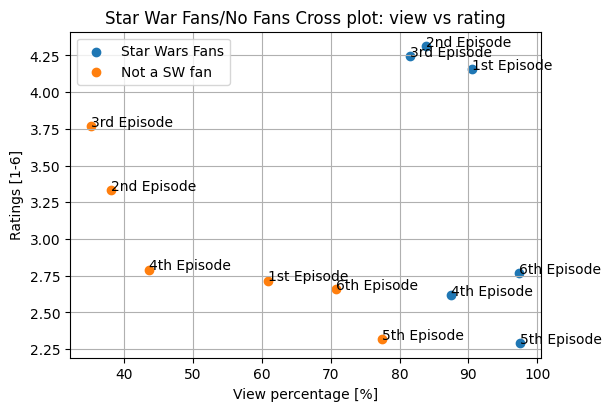

In [30]:
fig,axs = plt.subplots(figsize=(6,4),constrained_layout=True)


eps_name = ['1st Episode','2nd Episode','3rd Episode',
            '4th Episode','5th Episode','6th Episode']
X = sw_fans[sw_fans.columns[3:9]].apply(calc_seen_perc)
#Y =        sw_fans.iloc[:,9:15].mean()
Y =        sw_fans.iloc[:,38:44].mean()
plt.scatter(X,Y)

for i, label in enumerate(eps_name):
    plt.annotate(label, (X[i], Y[i]))

X = sw_nofans[sw_fans.columns[3:9]].apply(calc_seen_perc)
#Y = sw_nofans.iloc[:,9:15].mean()
Y = sw_nofans.iloc[:,38:44].mean()
plt.scatter(X,Y)

for i, label in enumerate(eps_name):
    plt.annotate(label, (X[i], Y[i]))

    axs.legend(['Star Wars Fans', 'Not a SW fan'])
axs.grid(True)

axs.set_title('Star War Fans/No Fans Cross plot: view vs rating')
axs.set_ylabel('Ratings [1-6]')
axs.set_xlabel('View percentage [%]')


### Conclusion
This cross plot allows a much clearer distinction of the two groups and their repsective view rate and rating: <br> 1. Non fans view percentage are clearly below Fans <br> 2. Episode V gets highest ranking with highest view rate in both groups <br> 3. SW fans rate the initial trilogy (IV+V+VI) much higher then the later sequels <br> 4. Non-SW fans rate 1st Episode second best

### Analyse influence of Gender

In [31]:
males   = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']


Text(0.5, 0, 'View percentage [%]')

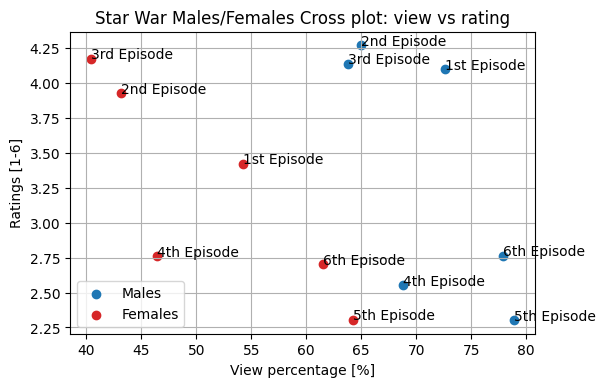

In [32]:
fig,axs = plt.subplots()


eps_name = ['1st Episode','2nd Episode','3rd Episode',
            '4th Episode','5th Episode','6th Episode']
X = males[males.columns[3:9]].apply(calc_seen_perc)
#Y = males.iloc[:,9:15].mean()
Y = males.iloc[:,38:44].mean()
plt.scatter(X,Y)

for i, label in enumerate(eps_name):
    plt.annotate(label, (X[i], Y[i]))

X = females[females.columns[3:9]].apply(calc_seen_perc)
#Y = females.iloc[:,9:15].mean()
Y = females.iloc[:,38:44].mean()
plt.scatter(X,Y,color='tab:red')

for i, label in enumerate(eps_name):
    plt.annotate(label, (X[i], Y[i]))

axs.legend(['Males', 'Females'])
axs.grid(True)

axs.set_title('Star War Males/Females Cross plot: view vs rating')
axs.set_ylabel('Ratings [1-6]')
axs.set_xlabel('View percentage [%]')

### Conclusion
Males rate the initial trilogy reasonably higher then the sequels (ref. Cross plot Star Wars Fans/No). <br> Females ratings for Episode I are much better, Episode II+III are rated inverted compared with Male rating <br> View rate differs between Male and Female by ~15%

#### Cross-check Male/Female distribution amongs Star Wars Fans

Text(0.5, 1.0, 'No Star Wars Fans')

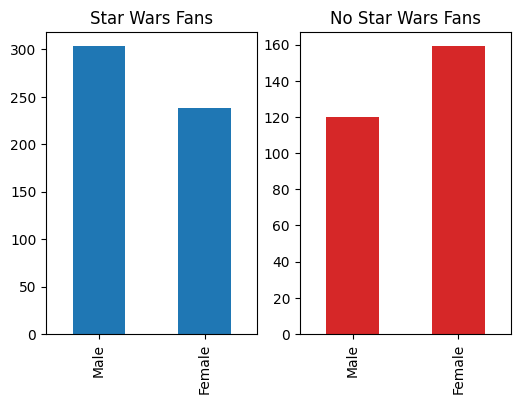

In [33]:
fig,axs = plt.subplots(nrows=1, ncols=2)
sw_fans['Gender'].value_counts().plot.bar(ax=axs[0])
sw_nofans['Gender'].value_counts().sort_values(ascending=True).plot.bar(ax=axs[1],color='tab:red')
axs[0].set_title('Star Wars Fans')
axs[1].set_title('No Star Wars Fans')

#### Conclusion
We observe more star war fans amongs males, therefore the male ratings ressembles the one of the star war fans.

### Analyse influence of Star Trek Fandom

In [34]:
trekkie    = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
no_trekkie =  star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']

Text(0.5, 0, 'View percentage [%]')

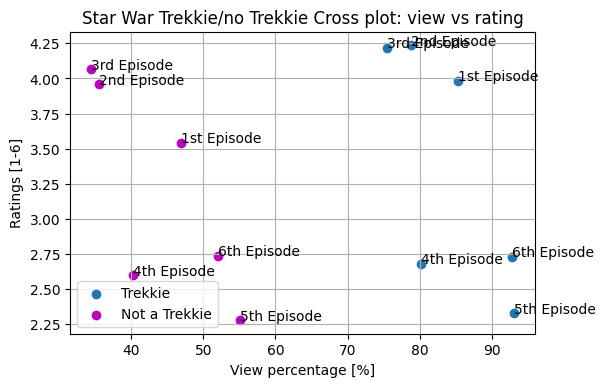

In [35]:
fig,axs = plt.subplots()


eps_name = ['1st Episode','2nd Episode','3rd Episode',
            '4th Episode','5th Episode','6th Episode']
X = trekkie[trekkie.columns[3:9]].apply(calc_seen_perc)
#Y = trekkie.iloc[:,9:15].mean()
Y = trekkie.iloc[:,38:44].mean()
plt.scatter(X,Y)

for i, label in enumerate(eps_name):
    plt.annotate(label, (X[i], Y[i]))

X = no_trekkie[no_trekkie.columns[3:9]].apply(calc_seen_perc)
#Y = no_trekkie.iloc[:,9:15].mean()
Y = no_trekkie.iloc[:,38:44].mean()
plt.scatter(X,Y,color='m')

for i, label in enumerate(eps_name):
    plt.annotate(label, (X[i], Y[i]))

axs.legend(['Trekkie', 'Not a Trekkie'])
axs.grid(True)

axs.set_title('Star War Trekkie/no Trekkie Cross plot: view vs rating')
axs.set_ylabel('Ratings [1-6]')
axs.set_xlabel('View percentage [%]')

### Conclusion
Trekkies and non-Trekkies have same rating order (except Episodes II+III). <br> The trekkie rating shows though similar gap between Episode VI and Episode I, as for the Star Wars fans or Males. <br> The view percentage differs strongly, showing the strongest gap so far observed with ~20%.

### Check of other influences

#### In depth analysis Gender influence
* Quick analysis of view rate by movie and gender

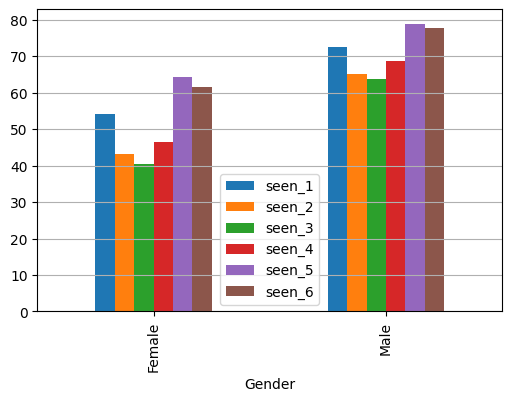

In [36]:
fig,axs = plt.subplots()
#grouped = star_wars[star_wars.columns[9:15]].groupby(star_wars['Gender'])
#grouped = star_wars[star_wars.columns[38:44]].groupby(star_wars['Gender'])
#grouped.mean().plot().bar(ax=axs)
grouped = star_wars[star_wars.columns[3:9]].groupby(star_wars['Gender'])
grouped.agg(calc_seen_perc).plot.bar(ax=axs)
axs.grid(axis='y')

#### Conclusion
We can observe a general shift between female and male view rate, episode ranking seems to correlate. Most viewn episodes: V,VI,I,... 

#### Analyse rating distribution in function of gender

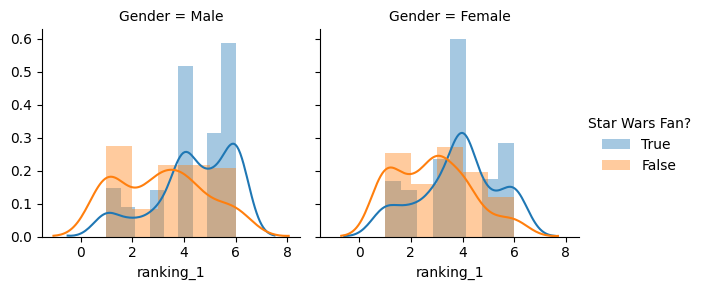

In [37]:
g = sns.FacetGrid(star_wars, col='Gender',
                  hue='Do you consider yourself to be a fan of the Star Wars film franchise?')
g.map(sns.distplot,"ranking_1")#,kde=False)
g.add_legend(title='Star Wars Fan?')

##### Conclusion
Female And Male ratings seem to depend a lot of the fact if the person was a Star Wars fan. Non-Fans seem to rate Episode 1 evenly distributed, whereas most Fans rate the move 4 or higher. 

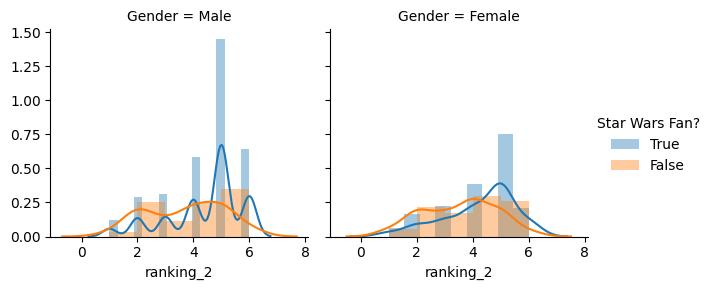

In [38]:
g = sns.FacetGrid(star_wars, col='Gender',
                  hue='Do you consider yourself to be a fan of the Star Wars film franchise?')
g.map(sns.distplot,"ranking_2")#,kde=False)
g.add_legend(title='Star Wars Fan?')

##### Conclusion
Both female and male SW fans seem to dislike Episode 2 rating it 5 (male>50%, female>25%).<br> Non SW fans seem to rate the movie evenly somewhere between 2-5.

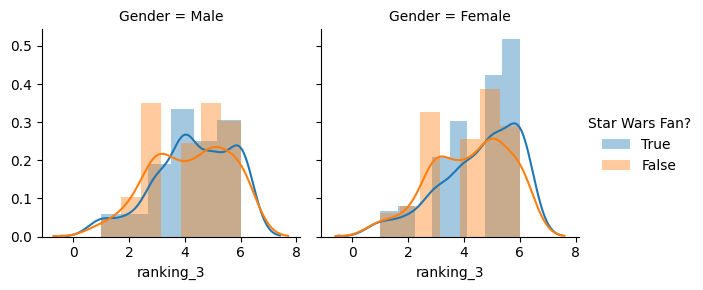

In [39]:
g = sns.FacetGrid(star_wars, col='Gender',
                  hue='Do you consider yourself to be a fan of the Star Wars film franchise?')
g.map(sns.distplot,"ranking_3")#,kde=False)
g.add_legend(title='Star Wars Fan?')

##### Conclusion
SW fans (female & male) rate Episode 3 or higher. <br> Non fans ratings are more evenly distributed

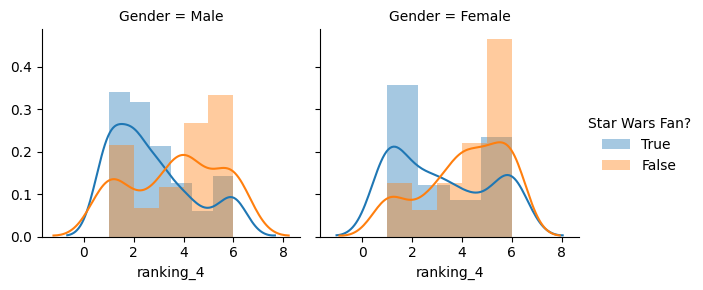

In [40]:
g = sns.FacetGrid(star_wars, col='Gender',
                  hue='Do you consider yourself to be a fan of the Star Wars film franchise?')
g.map(sns.distplot,"ranking_4")#,kde=False)
g.add_legend(title='Star Wars Fan?')

##### Conclusion
SW fans ratings of Episode 4 show a clear peak just below 2.<br> Whereas non-SW fans seem to rate Episode 4 3 or higher

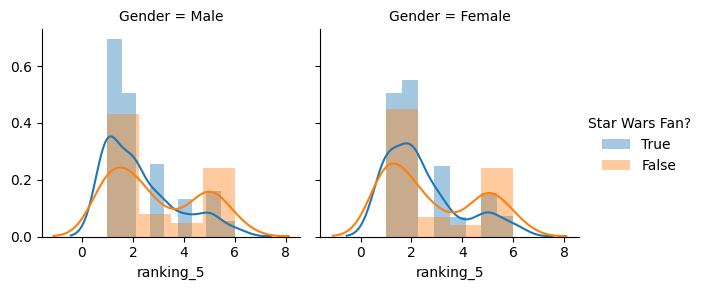

In [41]:
g = sns.FacetGrid(star_wars, col='Gender',
                  hue='Do you consider yourself to be a fan of the Star Wars film franchise?')
g.map(sns.distplot,"ranking_5")#,kde=False)
g.add_legend(title='Star Wars Fan?')

###### Conclusion
Episode 5 seems to obtain same rating distribution independent of gender and if the person was or not a star wars fan

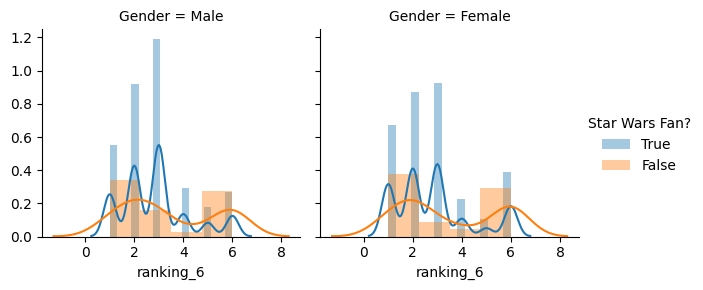

In [42]:
g = sns.FacetGrid(star_wars, col='Gender',
                  hue='Do you consider yourself to be a fan of the Star Wars film franchise?')
g.map(sns.distplot,"ranking_6")#,kde=False)
g.add_legend(title='Star Wars Fan?')

##### Conclusion
Episode 6 most ratings <3 in case of SW fans, independently of gender.
<br> Non Fans show two camps, either very good ratings (1) or very poor (6) for both female or male subjects.

#### Analyse Influence of Education

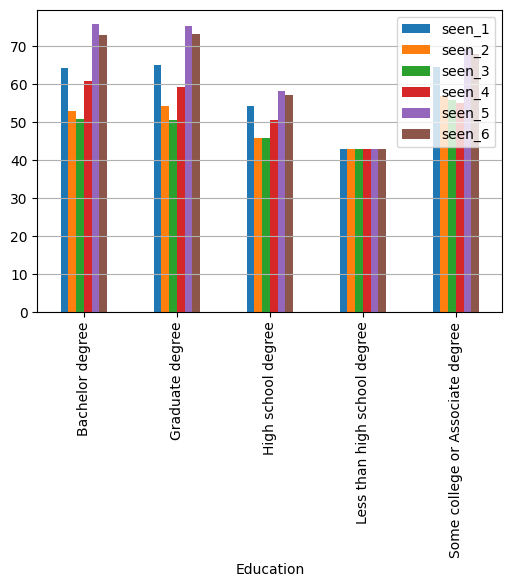

In [43]:
fig,axs = plt.subplots()#(nrows=2)
#grouped = star_wars[star_wars.columns[9:15]].groupby(star_wars['Education'])
#grouped.mean().plot.bar(ax=axs[0])
#grouped.min().plot.bar(ax=axs[1])

grouped = star_wars[star_wars.columns[3:9]].groupby(star_wars['Education'])
grouped.agg(calc_seen_perc).plot.bar(ax=axs)

axs.grid(axis='y')

##### Conclusion
The view percentage seems to increase with higher educational degree, from 40% -> 70%.

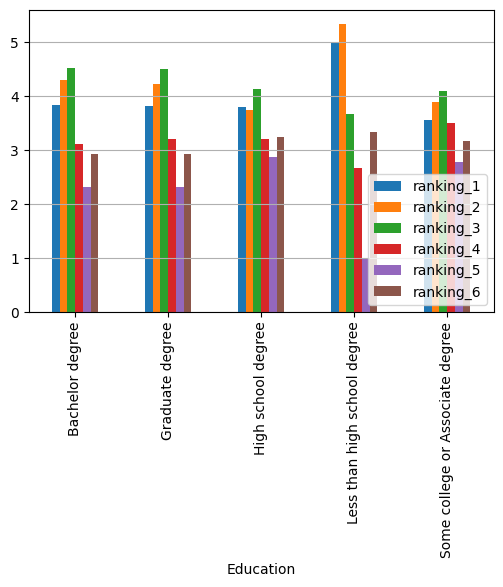

In [44]:
fig,axs = plt.subplots()#(nrows=2)
grouped = star_wars[star_wars.columns[9:15]].groupby(star_wars['Education'])
grouped.mean().plot.bar(ax=axs)
#grouped.min().plot.bar(ax=axs[1])

#grouped = star_wars[star_wars.columns[3:9]].groupby(star_wars['Education'])
#grouped.agg(calc_seen_perc).plot.bar(ax=axs)

axs.grid(axis='y')
axs.legend(loc=4)

##### Conclusion
Relative ranking of Episodes is maintained independent of educational degree, some inversions can be seen. <br>Episode 5 is rated with an average ranking of 1 amongst "Less than high school degree" in contrast with other educational groups 2-3.  

#### Analyse influence of Location/Region

Text(0, 0.5, 'Avg view percentage [%]')

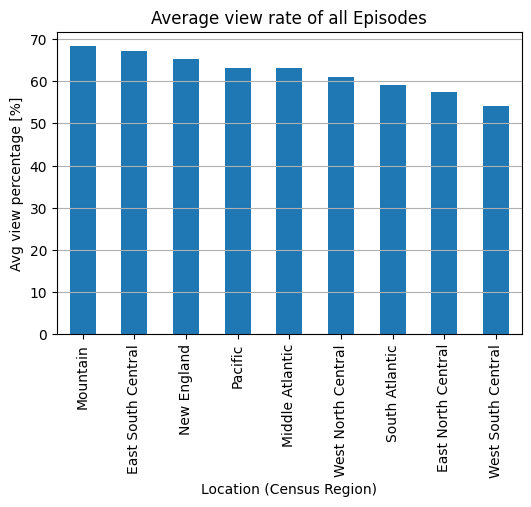

In [45]:
fig,axs = plt.subplots()
grouped = star_wars[star_wars.columns[9:15]].groupby(star_wars['Location (Census Region)'])
#grouped.mean().plot.bar(ax=axs)

grouped = star_wars[star_wars.columns[3:9]].groupby(star_wars['Location (Census Region)'])
grouped.agg(calc_seen_perc).mean(axis=1).sort_values(ascending=False).plot.bar(ax=axs)
#axs.legend(loc=4)
axs.grid(axis='y')
axs.set_title('Average view rate of all Episodes')
axs.set_ylabel('Avg view percentage [%]')

Text(0, 0.5, 'Avg view percentage [%]')

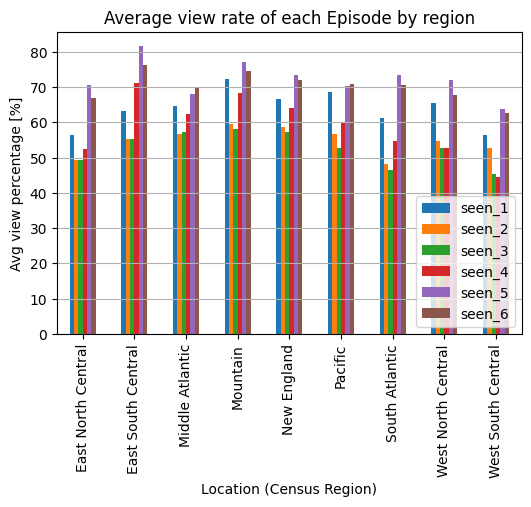

In [46]:
fig,axs = plt.subplots()
grouped = star_wars[star_wars.columns[9:15]].groupby(star_wars['Location (Census Region)'])
#grouped.mean().plot.bar(ax=axs)

grouped = star_wars[star_wars.columns[3:9]].groupby(star_wars['Location (Census Region)'])
grouped.agg(calc_seen_perc).plot.bar(ax=axs)
axs.legend(loc=4)
axs.grid(axis='y')
axs.set_title('Average view rate of each Episode by region')
axs.set_ylabel('Avg view percentage [%]')

##### Conclusion
The highest view percentages of all episodes are achieved in 
* Mountain
* East South Central
* New England

The East South Central region shows the highest view rates for the original trilogy (IV,V,VI).<br> The West South Central achieved the lowest view rate of the new trilogy (I,II,III) 

### Analysing the question: Who shot first?

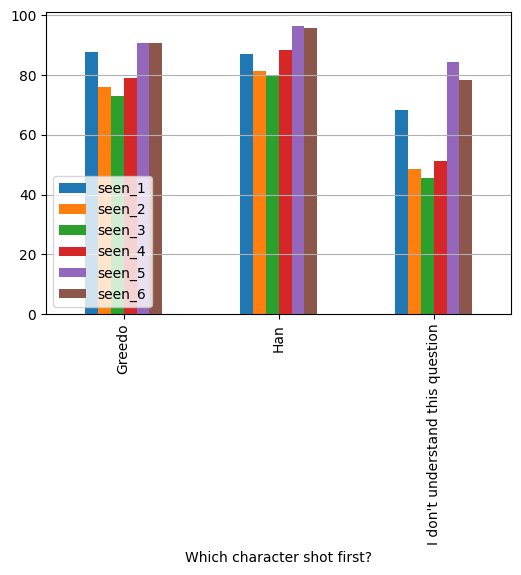

In [47]:
fig,axs = plt.subplots()
grouped = star_wars[star_wars.columns[9:15]].groupby(star_wars['Which character shot first?'])
#grouped.mean().plot.bar(ax=axs)
grouped = star_wars[star_wars.columns[3:9]].groupby(star_wars['Which character shot first?'])
grouped.agg(calc_seen_perc).plot.bar(ax=axs)

axs.grid(axis='y')
axs.legend(loc=3)

In [48]:
def calc_who_shot_perc(col):
    temp = col.value_counts()
    return temp.loc[r"I don't understand this question"]/(temp["I don't understand this question"]+temp['Han']+temp['Greedo'])*100

Text(0.5, 1.0, "Percentage: I don't understand this question")

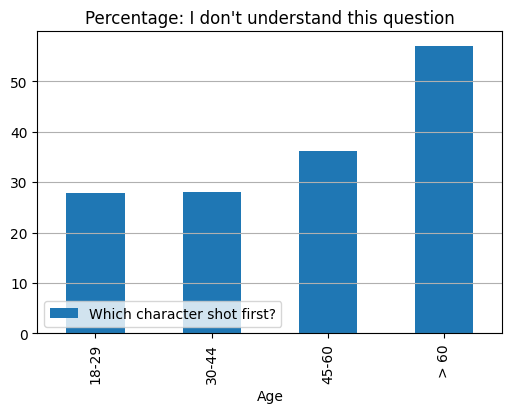

In [49]:
fig,axs = plt.subplots()
grouped = star_wars['Which character shot first?'].groupby(star_wars['Age'])
grouped.agg(calc_who_shot_perc).plot.bar(ax=axs)

axs.grid(axis='y')
axs.legend(loc=3)
axs.set_title("Percentage: I don't understand this question" )

### Conclusion
Subjects that answered with 'I don't understand this question' show the lowest view percentage of all Episodes and especially the Episode IV.<br>
More than 50% of the over year old answered with 'I don't get this question'. The Percentage seems to increase with age of the interviewed Person.<br> Which is strange, as the older persons can be expected to have seen the original cut of Episode 4 in 1977.


### Most popular characters

In [50]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [51]:
# create a renaming dictionaray based on five-thirtyeight published info
character_rn_dict = dict(zip(star_wars.columns[15:29],
                   ['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda']))          
#                   ['Luke','Han','Leia','Obi Wan','Yoda','R2-D2','C-3PO','Anakin','Darth Vader','Lando','Padme Amidala','Boba Fett','Palpatine','Jar Jar Binks']))

In [52]:
star_wars = star_wars.rename(columns=character_rn_dict)

In [53]:
star_wars['Han Solo'].value_counts()#['Very favorably']+

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [54]:
def get_fav_perc(col):
    temp = col.value_counts()
    return round((temp['Very favorably']+temp['Somewhat favorably'])/temp.sum()*10000)/100

In [55]:
def get_unfav_perc(col):
    temp = col.value_counts()
    return round((temp['Very unfavorably']+temp['Somewhat unfavorably'])/temp.sum()*10000)/100

In [56]:
fav = star_wars[star_wars.columns[15:29]].agg(get_fav_perc)

In [57]:
unfav = star_wars[star_wars.columns[15:29]].agg(get_unfav_perc)

Text(0, 0.5, 'Percentage [%]')

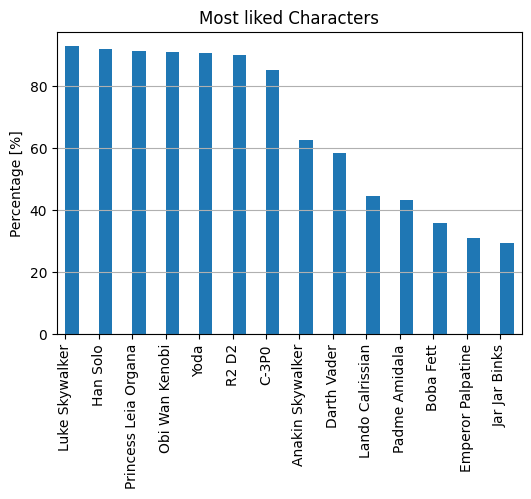

In [58]:
fig,axs = plt.subplots()
fav.sort_values(ascending=False).plot.bar(ax=axs,color='tab:blue',width=0.4 ,align='edge')
axs.grid(axis='y')
axs.set_title('Most liked Characters')
axs.set_ylabel('Percentage [%]')

Text(0, 0.5, 'Percentage [%]')

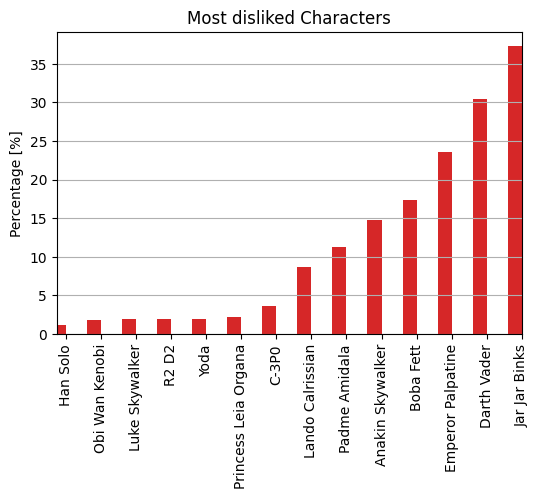

In [59]:
fig,axs = plt.subplots()
unfav.sort_values().plot.bar(ax=axs,color='tab:red',width=-0.4 ,align='edge')
axs.grid(axis='y')
axs.set_title('Most disliked Characters')
axs.set_ylabel('Percentage [%]')

Text(0, 0.5, 'Percentage [%]')

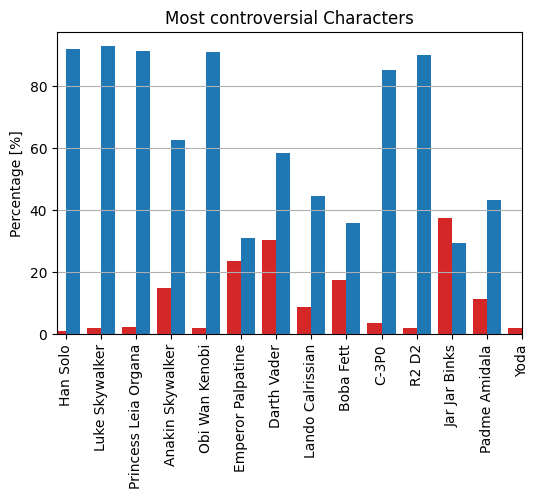

In [60]:
fig,axs = plt.subplots()
fav.plot.bar(ax=axs,color='tab:blue',width=0.4 ,align='edge')
unfav.plot.bar(ax=axs,color='tab:red',width=-0.4 ,align='edge')
axs.grid(axis='y')
axs.set_title('Most controversial Characters')
axs.set_ylabel('Percentage [%]')

### Conclusion
* The most liked character is Luke Skywalker.<br>
* The most unliked character is Jar Jar Binks.<br>
* The most controversial characters are Darth Vader and Jar Jar Binks having both high rankings in the like / disliked category